<a href="https://colab.research.google.com/github/tsffarias/ibge-nomes-brasil/blob/main/Projeto_M%C3%B3dulo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 4 (Vamo AI) - Storytelling com dados
* **Base de dados:** br_ibge_nomes_brasil (Nomes no Brasil)
* **Integrantes do Time:** Mariãn do Carmo, Luzivan Lira, Thiago Silva

# Importando Base dos Dados

In [ ]:
# download bibliotecatas
!pip install basedosdados
!pip install --upgrade spacy
!python -m spacy download pt_core_news_sm

In [ ]:
#import basedosdados as bd
#import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sp = spacy.load('pt_core_news_sm')

In [ ]:
bd.list_datasets(filter_by='nomes')


dataset_id: 
	br_ibge_nomes_brasil 
-----------------------------------------------------------------------------------------------



In [ ]:
df = bd.read_table(dataset_id='br_ibge_nomes_brasil', 
            table_id='quantidade_municipio_nome_2010',
            billing_project_id='basedosdados-317301')

Downloading: 100%|██████████| 1959116/1959116 [00:04<00:00, 467156.60rows/s]


In [ ]:
# salvando arquivo em csv
df.to_csv('br_ibge_nomes_brasil.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/datasets_brasil_info/br_ibge_nomes_brasil.csv')
df.head()

,Unnamed: 0,id_municipio,nome,qtde_nascimentos_ate_2010
0,0,1100015,Ademir,46
1,1,1100015,Adriana,60
2,2,1100015,Aline,77
3,3,1100015,Amanda,51
4,4,1100015,Ana,300


# Adicionando UF, Municipio e Região ao dataset

In [ ]:
dataset_diretorios = bd.read_table(dataset_id='br_bd_diretorios_brasil', 
            table_id='municipio',
            billing_project_id='basedosdados-317301')

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=262006177488-3425ks60hkk80fssi9vpohv88g6q1iqd.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform&state=XFQssaTXtTtuErOClAfDn1pSe9XDwF&prompt=consent&access_type=offline
Enter the authorization code: 4/1AY0e-g5S5dFo_hnrBxPgDL-BYfXhHuGN7jOb1Y88NXaPCIeulE9qoxa7W4A


Downloading: 100%|██████████| 5570/5570 [00:03<00:00, 1396.72rows/s]


In [ ]:
# salvando arquivo em csv
dataset_diretorios.to_csv('br_bd_diretorios_brasil.csv', index=False)

In [ ]:
dataset_diretorios = pd.read_csv('/content/drive/MyDrive/datasets/datasets_brasil_info/br_bd_diretorios_brasil.csv')
dataset_diretorios.head()

,Unnamed: 0,id_municipio,id_municipio_6,id_municipio_tse,id_municipio_rf,id_municipio_bcb,municipio,capital_uf,id_comarca,id_regiao_saude,regiao_saude,id_regiao_imediata,regiao_imediata,id_regiao_intermediaria,regiao_intermediaria,id_microrregiao,microrregiao,id_mesorregiao,mesorregiao,ddd,id_uf,sigla_uf,uf,regiao
0,0,1100023,110002,78,7,9393.0,Ariquemes,0,1100023,11001,Vale do Jamari,110002,Ariquemes,1101,Porto Velho,11003,Ariquemes,1102,Leste Rondoniense,69,11,RO,Rondônia,Norte
1,1,1100106,110010,19,1,22882.0,Guajará-Mirim,0,1100106,11004,Madeira-Mamoré,110001,Porto Velho,1101,Porto Velho,11002,Guajará-Mirim,1101,Madeira-Guaporé,69,11,RO,Rondônia,Norte
2,2,1100114,110011,159,15,41258.0,Jaru,0,1100114,11003,Central,110003,Jaru,1101,Porto Velho,11004,Ji-Paraná,1102,Leste Rondoniense,69,11,RO,Rondônia,Norte
3,3,1100130,110013,396,39,44547.0,Machadinho D'Oeste,0,1100130,11001,Vale do Jamari,110003,Jaru,1101,Porto Velho,11003,Ariquemes,1102,Leste Rondoniense,69,11,RO,Rondônia,Norte
4,4,1100205,110020,35,3,30719.0,Porto Velho,1,1100205,11004,Madeira-Mamoré,110001,Porto Velho,1101,Porto Velho,11001,Porto Velho,1101,Madeira-Guaporé,69,11,RO,Rondônia,Norte


In [ ]:
dataset_diretorios = dataset_diretorios[['id_municipio', 'uf', 'municipio','regiao']].set_index('id_municipio')
dataset_diretorios.head()

,uf,municipio,regiao
id_municipio,,,
1100023,Rondônia,Ariquemes,Norte
1100106,Rondônia,Guajará-Mirim,Norte
1100114,Rondônia,Jaru,Norte
1100130,Rondônia,Machadinho D'Oeste,Norte
1100205,Rondônia,Porto Velho,Norte


In [ ]:
dataset_diretorios.shape

(5570, 3)

In [ ]:
# realizando o join dos datasets
dataset_nomes_brasil = df.join(dataset_diretorios, on='id_municipio')
dataset_nomes_brasil.head()

,Unnamed: 0,id_municipio,nome,qtde_nascimentos_ate_2010,uf,municipio,regiao
0,0,1100015,Ademir,46,Rondônia,Alta Floresta D'Oeste,Norte
1,1,1100015,Adriana,60,Rondônia,Alta Floresta D'Oeste,Norte
2,2,1100015,Aline,77,Rondônia,Alta Floresta D'Oeste,Norte
3,3,1100015,Amanda,51,Rondônia,Alta Floresta D'Oeste,Norte
4,4,1100015,Ana,300,Rondônia,Alta Floresta D'Oeste,Norte


In [ ]:
# salvando arquivo em csv
dataset_nomes_brasil.to_csv('dataset_nomes_brasil.csv', index=False)

In [ ]:
dataset_nomes_brasil = pd.read_csv('/content/drive/MyDrive/datasets/datasets_brasil_info/dataset_nomes_brasil.csv')
dataset_nomes_brasil.head()

,id_municipio,nome,qtde_nascimentos_ate_2010,uf,municipio,regiao,país
0,1100015,Ademir,46,Rondônia,Alta Floresta D'Oeste,Norte,Brasil
1,1100015,Adriana,60,Rondônia,Alta Floresta D'Oeste,Norte,Brasil
2,1100015,Aline,77,Rondônia,Alta Floresta D'Oeste,Norte,Brasil
3,1100015,Amanda,51,Rondônia,Alta Floresta D'Oeste,Norte,Brasil
4,1100015,Ana,300,Rondônia,Alta Floresta D'Oeste,Norte,Brasil


In [ ]:
dataset_nomes_brasil.shape

(1959116, 7)

# Análise Exploratória de Dados

In [ ]:
# numero de registros
dataset_nomes_brasil.shape

(1959116, 7)

In [ ]:
# quais colunas possuem valores nulos
dataset_nomes_brasil.isna().sum()

id_municipio                 0
nome                         0
qtde_nascimentos_ate_2010    0
uf                           0
municipio                    0
regiao                       0
país                         0
dtype: int64

In [ ]:
# quantidade de municipios
dataset_nomes_brasil.id_municipio.nunique()

5565

In [ ]:
dataset_qtd_nome_por_uf = dataset_nomes_brasil.groupby('uf').qtde_nascimentos_ate_2010.sum()
dataset_qtd_nome_por_uf

uf
Acre                     483928
Alagoas                 2307440
Amapá                    460141
Amazonas                2491089
Bahia                   9686344
Ceará                   6775417
Distrito Federal        2275069
Espírito Santo          2510096
Goiás                   4159040
Maranhão                4413070
Mato Grosso             1929455
Mato Grosso do Sul      1754972
Minas Gerais           14343740
Paraná                  7813978
Paraíba                 2653604
Pará                    5423873
Pernambuco              6790838
Piauí                   2076743
Rio Grande do Norte     2239061
Rio Grande do Sul       7812708
Rio de Janeiro         13862527
Rondônia                1030752
Roraima                  280385
Santa Catarina          4406235
Sergipe                 1454757
São Paulo              34802277
Tocantins                732131
Name: qtde_nascimentos_ate_2010, dtype: int64

In [ ]:
# somando quantidade total de nomes
total_qtd_nomes = dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()
total_qtd_nomes = total_qtd_nomes.sort_values(ascending=False)
total_qtd_nomes = total_qtd_nomes.reset_index().reset_index().rename(columns={'index': 'ranking'})
total_qtd_nomes

,ranking,nome,qtde_nascimentos_ate_2010
0,0,Maria,11734129
1,1,Jose,5754470
2,2,Ana,3089834
3,3,Joao,2984088
4,4,Antonio,2576156
...,...,...,...
33071,33071,Fabiio,10
33072,33072,Junivaldo,10
33073,33073,Elidian,10
33074,33074,Devilson,10


In [ ]:
total_qtd_nomes.nome

0            Maria
1             Jose
2              Ana
3             Joao
4          Antonio
           ...    
33071       Fabiio
33072    Junivaldo
33073      Elidian
33074     Devilson
33075       Geroni
Name: nome, Length: 33076, dtype: object

In [ ]:
# quantidade de nomes diferentes
total_qtd_nomes.nome.value_counts().sum()

33076

In [ ]:
# top 10 nomes mais comuns
total_qtd_nomes[:10]

,ranking,nome,qtde_nascimentos_ate_2010
0,0,Maria,11734129
1,1,Jose,5754470
2,2,Ana,3089834
3,3,Joao,2984088
4,4,Antonio,2576156
5,5,Francisco,1769237
6,6,Carlos,1488077
7,7,Paulo,1422346
8,8,Pedro,1219050
9,9,Lucas,1125716


In [ ]:
# top 10 nomes incomuns
total_qtd_nomes[-10:]

,ranking,nome,qtde_nascimentos_ate_2010
33066,33066,Seiiti,10
33067,33067,Mallu,10
33068,33068,Maleide,10
33069,33069,Devany,10
33070,33070,Aritusa,10
33071,33071,Fabiio,10
33072,33072,Junivaldo,10
33073,33073,Elidian,10
33074,33074,Devilson,10
33075,33075,Geroni,10


# Top 5 nomes mais usados no Brasil por região

In [ ]:
dataset_nomes_brasil['regiao'].unique()

array(['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'],
      dtype=object)

In [ ]:
df_norte = dataset_nomes_brasil[dataset_nomes_brasil.regiao == 'Norte']
df_norte

,id_municipio,nome,qtde_nascimentos_ate_2010,uf,municipio,regiao,país
0,1100015,Ademir,46,Rondônia,Alta Floresta D'Oeste,Norte,Brasil
1,1100015,Adriana,60,Rondônia,Alta Floresta D'Oeste,Norte,Brasil
2,1100015,Aline,77,Rondônia,Alta Floresta D'Oeste,Norte,Brasil
3,1100015,Amanda,51,Rondônia,Alta Floresta D'Oeste,Norte,Brasil
4,1100015,Ana,300,Rondônia,Alta Floresta D'Oeste,Norte,Brasil
...,...,...,...,...,...,...,...
1950088,1721000,Romildo,45,Tocantins,Palmas,Norte,Brasil
1950089,1721000,Sirlene,45,Tocantins,Palmas,Norte,Brasil
1950090,1721208,Cicero,45,Tocantins,Tocantinópolis,Norte,Brasil
1950091,1721208,Joana,45,Tocantins,Tocantinópolis,Norte,Brasil


In [ ]:
# Norte
df_norte = dataset_nomes_brasil[dataset_nomes_brasil.regiao == 'Norte']
df_norte = df_norte.groupby('nome').qtde_nascimentos_ate_2010.sum()
df_norte = df_norte.sort_values(ascending=False)
df_norte = df_norte[:3].to_frame()
df_norte

,qtde_nascimentos_ate_2010
nome,
Maria,924862
Jose,381889
Antonio,236894


In [ ]:
# Nordeste
df_nordeste = dataset_nomes_brasil[dataset_nomes_brasil.regiao == 'Nordeste']
df_nordeste = df_nordeste.groupby('nome').qtde_nascimentos_ate_2010.sum()
df_nordeste = df_nordeste.sort_values(ascending=False)
df_nordeste = df_nordeste[:3].to_frame()
df_nordeste

,qtde_nascimentos_ate_2010
nome,
Maria,4784557
Jose,2450379
Francisco,1097383


In [ ]:
# Sudeste
df_sudeste = dataset_nomes_brasil[dataset_nomes_brasil.regiao == 'Sudeste']
df_sudeste = df_sudeste.groupby('nome').qtde_nascimentos_ate_2010.sum()
df_sudeste = df_sudeste.sort_values(ascending=False)
df_sudeste = df_sudeste[:3].to_frame()
df_sudeste

,qtde_nascimentos_ate_2010
nome,
Maria,4371984
Jose,2139644
Ana,1371222


In [ ]:
# Sul
df_Sul = dataset_nomes_brasil[dataset_nomes_brasil.regiao == 'Sul']
df_Sul = df_Sul.groupby('nome').qtde_nascimentos_ate_2010.sum()
df_Sul = df_Sul.sort_values(ascending=False)
df_Sul = df_Sul[:3].to_frame()
df_Sul

,qtde_nascimentos_ate_2010
nome,
Maria,964971
Jose,464675
Joao,453133


In [ ]:
# Centro-Oeste
df_Centro_Oeste = dataset_nomes_brasil[dataset_nomes_brasil.regiao == 'Centro-Oeste']
df_Centro_Oeste = df_Centro_Oeste.groupby('nome').qtde_nascimentos_ate_2010.sum()
df_Centro_Oeste = df_Centro_Oeste.sort_values(ascending=False)
df_Centro_Oeste = df_Centro_Oeste[:3].to_frame()
df_Centro_Oeste

,qtde_nascimentos_ate_2010
nome,
Maria,687755
Jose,317883
Joao,241272


In [ ]:
regioes = list(dataset_nomes_brasil['regiao'].unique())
regioes

['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']

In [ ]:
df_Centro_Oeste

,qtde_nascimentos_ate_2010
nome,
Maria,687755
Jose,317883
Joao,241272


In [ ]:
df_Centro_Oeste['qtde_nascimentos_ate_2010'].values

array([687755, 317883, 241272])

In [ ]:
df_Centro_Oeste.index

Index(['Maria', 'Jose', 'Joao'], dtype='object', name='nome')

# Contabilizando a quantidade de registros por Estado e Região

In [ ]:
# Contabilizando a quantidade de registros por Região
qtd_nome_regiao = dataset_nomes_brasil.groupby('regiao').qtde_nascimentos_ate_2010.sum()
qtd_nome_regiao = qtd_nome_regiao.sort_values(ascending=False)
qtd_nome_regiao

regiao
Sudeste         65518640
Nordeste        38397274
Sul             20032921
Norte           10902299
Centro-Oeste    10118536
Name: qtde_nascimentos_ate_2010, dtype: int64

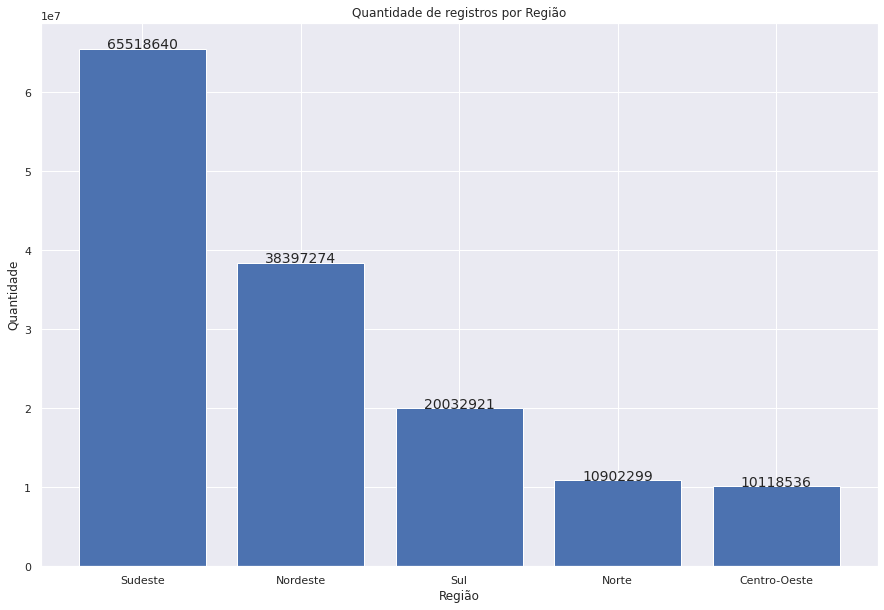

In [ ]:
# Grafico Contabilizando a quantidade de registros por Região
sns.set()
plt.figure(figsize=[15, 10])
plt.title('Quantidade de registros por Região')

plt.bar(qtd_nome_regiao.index, qtd_nome_regiao)

for index,data in enumerate(qtd_nome_regiao):
    plt.text(x=index , y=data+1, s=f"{data}", fontdict=dict(fontsize=14), ha='center')

plt.xlabel('Região')
plt.ylabel('Quantidade')
plt.show()

In [ ]:
# Contabilizando a quantidade de registros por Estado
qtd_nome_uf = dataset_nomes_brasil.groupby('uf').qtde_nascimentos_ate_2010.sum()
qtd_nome_uf = qtd_nome_uf.sort_values(ascending=False)[:5]
qtd_nome_uf

uf
São Paulo         34802277
Minas Gerais      14343740
Rio de Janeiro    13862527
Bahia              9686344
Paraná             7813978
Name: qtde_nascimentos_ate_2010, dtype: int64

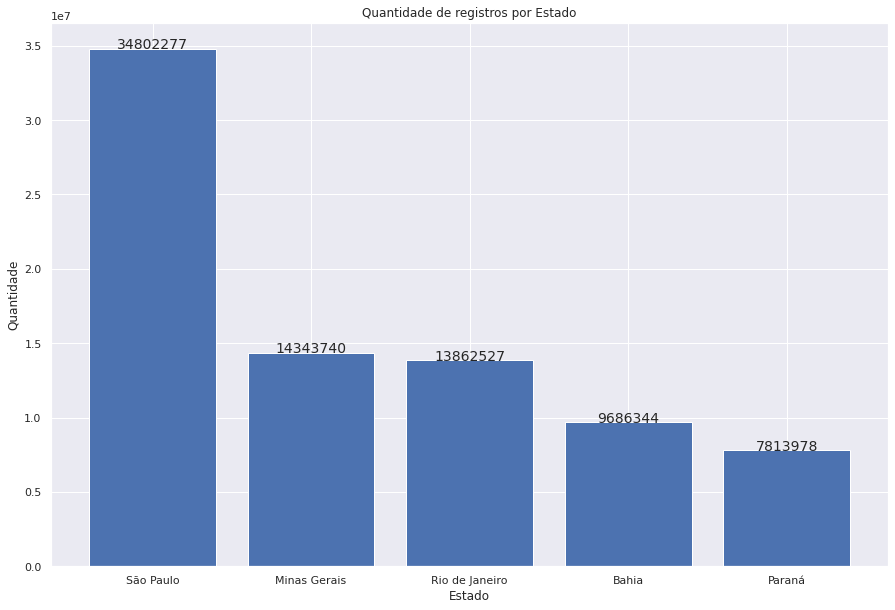

In [ ]:
# Grafico Contabilizando a quantidade de registros por Estado
sns.set()
plt.figure(figsize=[15, 10])
plt.title('Quantidade de registros por Estado')

plt.bar(qtd_nome_uf.index, qtd_nome_uf)

for index,data in enumerate(qtd_nome_uf):
    plt.text(x=index , y=data+1, s=f"{data}", fontdict=dict(fontsize=14), ha='center')

plt.xlabel('Estado')
plt.ylabel('Quantidade')

plt.show()

# Pessoas com o maior nome

In [ ]:
dataset_nomes_brasil[dataset_nomes_brasil['nome'].str.len() >= 13]

,id_municipio,nome,qtde_nascimentos_ate_2010,uf,municipio,regiao,país
143714,2927408,Melquisedeque,62,Bahia,Salvador,Nordeste,Brasil
480246,2408102,Melquesedeque,10,Rio Grande do Norte,Natal,Nordeste,Brasil
488612,2607901,Melquizedeque,10,Pernambuco,Jaboatão dos Guararapes,Nordeste,Brasil
489932,2610707,Melquezedeque,10,Pernambuco,Paulista,Nordeste,Brasil
503072,2910800,Melquezedeque,10,Bahia,Feira de Santana,Nordeste,Brasil
540261,3301702,Melquisedeque,10,Rio de Janeiro,Duque de Caxias,Sudeste,Brasil
564218,3550308,Francisquinha,10,São Paulo,São Paulo,Sudeste,Brasil
606845,5208707,Melquisedeque,10,Goiás,Goiânia,Centro-Oeste,Brasil
616817,1500800,Melquisedeque,11,Pará,Ananindeua,Norte,Brasil
632999,2211001,Melquesedeque,11,Piauí,Teresina,Nordeste,Brasil


In [ ]:
# Maior nome: 'Mariaaparecida'
dataset_nomes_brasil[dataset_nomes_brasil['nome'].str.len() >= 14]

,id_municipio,nome,qtde_nascimentos_ate_2010,uf,municipio,regiao,país
1577057,3550308,Mariaaparecida,24,São Paulo,São Paulo,Sudeste,Brasil


# Pessoas com o menor nome

In [ ]:
dataset_nomes_brasil[dataset_nomes_brasil['nome'].str.len() <= 2]

,id_municipio,nome,qtde_nascimentos_ate_2010,uf,municipio,regiao,país
2251,1100205,De,52,Rondônia,Porto Velho,Norte,Brasil
5213,1200401,Ma,63,Acre,Rio Branco,Norte,Brasil
5993,1300409,Rn,63,Amazonas,Barcelos,Norte,Brasil
8432,1302603,Da,47,Amazonas,Manaus,Norte,Brasil
8579,1302603,Ed,53,Amazonas,Manaus,Norte,Brasil
...,...,...,...,...,...,...,...
1950613,2303709,Ma,45,Ceará,Caucaia,Nordeste,Brasil
1954323,3300456,Da,45,Rio de Janeiro,Belford Roxo,Sudeste,Brasil
1954659,3304557,Sr,45,Rio de Janeiro,Rio de Janeiro,Sudeste,Brasil
1955072,3509502,De,45,São Paulo,Campinas,Sudeste,Brasil


# Pesquisa de nome de todos os alunos e demais facilitadores da VAMOAI

In [ ]:
#TOP 5 DE ALUNOS COM NOMES MAIS COMUNS NA VAMOAI
nomes_sala = pd.DataFrame(columns=['nome', 'quantidade'])
nomes_sala = nomes_sala.append({'nome' : 'Marian', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Marian']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Luzivan', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Luzivan']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Thiago', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Thiago']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Ana', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Ana']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Felipe', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Felipe']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Nathan', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Nathan']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Michelle', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Michelle']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Caroline', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Caroline']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Ramon', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Ramon']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Demetrio', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Demetrio']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Diego', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Diego']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Gabriela', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Gabriela']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Gisele', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Gisele']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Isabela', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Isabela']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Jefferson', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Jefferson']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Jennifer', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Jennifer']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Joao', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Joao']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Juliana', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Juliana']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Gabriel', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Gabriel']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Maressa', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Maressa']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Mateus', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Mateus']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Natalia', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Natalia']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Olavo', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Olavo']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Victor', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Victor']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Vithor', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Vithor']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Ludmila', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Ludmila']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Aline', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Aline']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Natascha', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Natascha']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Patryck', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Patryck']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Inaja', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Inaja']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Dayson', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Dayson']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Lais', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Lais']}, ignore_index=True)
nomes_sala = nomes_sala.append({'nome' : 'Leticia', 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Leticia']}, ignore_index=True)

#nomes_sala = nomes_sala.append({'nome' : 'Jheysson' , 'quantidade' : dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Jheysson']}, ignore_index=True)

nomes_sala= nomes_sala.sort_values(ascending=False, by='quantidade')
nomes_sala

,nome,quantidade
3,Ana,3089834
16,Joao,2984088
18,Gabriel,928731
4,Felipe,613713
20,Mateus,584145
17,Juliana,558001
26,Aline,505039
32,Leticia,427044
10,Diego,416117
11,Gabriela,370924


In [ ]:
# salvando tabela
nomes_sala.to_csv('nomes_sala_vamoai.csv', index=False)

In [ ]:
nomes_populares = nomes_sala[:5]

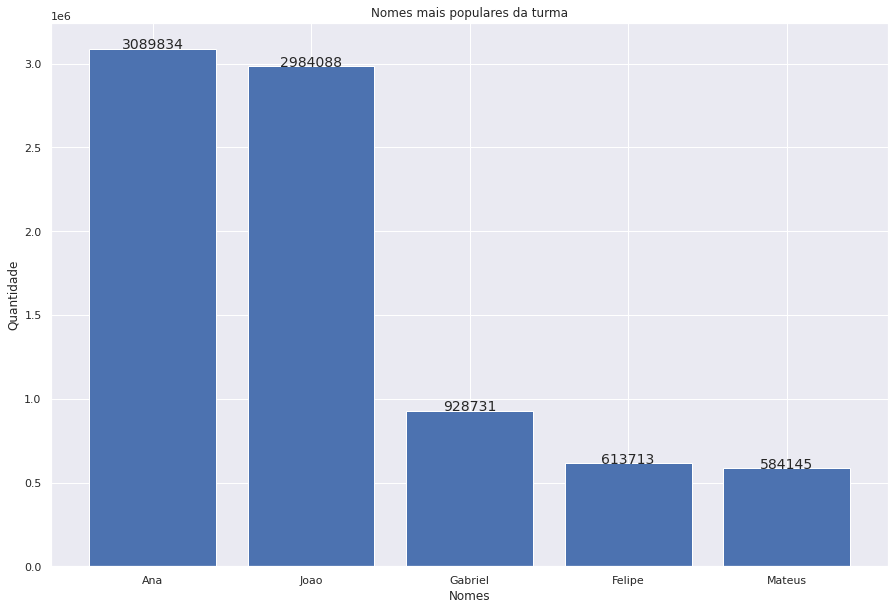

In [ ]:
# gráfico top 5 nomes mais populares da turma
sns.set()
plt.figure(figsize=[15, 10])
plt.title('Nomes mais populares da turma')

plt.bar(nomes_populares['nome'], nomes_populares['quantidade'])

for index,data in enumerate(nomes_populares['quantidade']):
    plt.text(x=index , y=data+1, s=f"{data}", fontdict=dict(fontsize=14), ha='center')

plt.xlabel('Nomes')
plt.ylabel('Quantidade')

plt.show()

In [ ]:
# quantidade de pessoas com o mesmo nome dos facilitadores
qtd_dayson = dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Dayson']
qtd_ana = dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Ana']
print(f'Dayson: {qtd_dayson} / Ana: {qtd_ana}')

Dayson: 48 / Ana: 3089834


# Análise nomes Times

In [ ]:
# quantidade de pessoas com o mesmo nome dos integrandes do time
qtd_marian = dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Marian']
qtd_luzivan = dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Luzivan']
qtd_thiago = dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()['Thiago']

print(f'Marian: {qtd_marian} / Luzivan: {qtd_luzivan} / Thiago: {qtd_thiago}')

Marian: 517 / Luzivan: 78 / Thiago: 332722


In [ ]:
# Temos mais Marian em São Paulo (204)
qtd_marian = dataset_nomes_brasil.groupby(['nome', 'uf']).qtde_nascimentos_ate_2010.sum()['Marian']
qtd_marian

uf
Amazonas               17
Bahia                  17
Ceará                  15
Distrito Federal       11
Mato Grosso do Sul     11
Minas Gerais           31
Paraná                 79
Rio Grande do Sul      27
Rio de Janeiro         85
Santa Catarina         20
São Paulo             204
Name: qtde_nascimentos_ate_2010, dtype: int64

In [ ]:
# Temos mais Luzivan em São Paulo (20)
qtd_luzivan = dataset_nomes_brasil.groupby(['nome', 'uf']).qtde_nascimentos_ate_2010.sum()['Luzivan']
qtd_luzivan

uf
Acre                17
Amazonas            16
Distrito Federal    15
Goiás               10
São Paulo           20
Name: qtde_nascimentos_ate_2010, dtype: int64

In [ ]:
# Temos mais Thiago em São Paulo (97263)
qtd_thiago = dataset_nomes_brasil.groupby(['nome', 'uf']).qtde_nascimentos_ate_2010.sum()['Thiago']
qtd_thiago = qtd_thiago.sort_values(ascending=False)
qtd_thiago

uf
São Paulo              97263
Rio de Janeiro         47079
Minas Gerais           33757
Paraná                 17324
Bahia                  13755
Pernambuco             12410
Goiás                  11483
Pará                   11244
Santa Catarina          9376
Rio Grande do Sul       9350
Ceará                   8265
Maranhão                7340
Espírito Santo          7279
Distrito Federal        7064
Amazonas                6172
Paraíba                 5149
Mato Grosso             4922
Mato Grosso do Sul      4763
Alagoas                 3912
Rio Grande do Norte     3624
Sergipe                 2691
Piauí                   2211
Tocantins               1963
Rondônia                1872
Acre                     943
Amapá                    787
Roraima                  724
Name: qtde_nascimentos_ate_2010, dtype: int64

In [ ]:
total_qtd_nomes.query('nome == "Tiago"')

,ranking,nome,qtde_nascimentos_ate_2010
39,39,Tiago,488692


In [ ]:
total_qtd_nomes.query('nome == "Thiago"')

,ranking,nome,qtde_nascimentos_ate_2010
75,75,Thiago,332722


In [ ]:
# existem mais Tiago que Thiago
# Tiago: 488692, Thiago: 332722

In [ ]:
def encontra_nomes_proximos(name):
  linha = total_qtd_nomes.query(f'nome == "{name}"').iloc[0].ranking
  return total_qtd_nomes.iloc[linha - 10: linha + 10]

encontra_nomes_proximos('Thiago')

,ranking,nome,qtde_nascimentos_ate_2010
65,65,Claudia,348542
66,66,Luana,348079
67,67,Rita,347212
68,68,Beatriz,346250
69,69,Sonia,344386
70,70,Claudio,342122
71,71,Matheus,339590
72,72,Renata,336273
73,73,Eliane,334365
74,74,Josefa,333664


In [ ]:
# nomes similares a Thiago
frequencia_nomes = dataset_nomes_brasil.groupby('nome').qtde_nascimentos_ate_2010.sum()
frequencia_nomes[29940:30010].sort_values(ascending=False).to_frame()

,qtde_nascimentos_ate_2010
nome,
Tiago,488692
Thiago,332722
Thomas,9360
Thyago,2154
Thomaz,1924
...,...
Thomazia,11
Thony,11
Thyara,11


# Pesquisando nomes com caracteres especiais ou numéricos

In [ ]:
def find_weird_names(string):
    doc = sp(string)
    search = [token.text for token in doc if not token.is_alpha]

    if len(search) > 0:
      return search

d = {'nomes_estranhos': []}
nomes_estranhos = pd.DataFrame(data=d)
nomes_estranhos['nomes_estranhos'] = df['nome'].apply(find_weird_names)
nomes_estranhos

,nomes_estranhos
0,None
1,None
2,None
3,None
4,None
...,...
1959111,None
1959112,None
1959113,None
1959114,None


In [ ]:
nomes_estranhos = nomes_estranhos[nomes_estranhos['nomes_estranhos'].notna()]
nomes_estranhos

,nomes_estranhos
1195292,[Jo?O]


In [ ]:
# salvando arquivo em csv
nomes_estranhos.to_csv('nomes_estranhos.csv')

In [ ]:
nome = df.groupby('nome').qtde_nascimentos_ate_2010.sum()['Jo?O']
nome

16